# World Happiness Report 2024 || EDA and Statistical Analysis

### About Dataset
**Context**

The World Happiness Report is a landmark survey of the state of global happiness. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.



### Dataset Overview

**Here's a brief explanation of each column in the dataset:**

1. Country name: Name of the country.
2. Regional indicator: Region to which the country belongs.
3. Ladder score: The happiness score for each country, based on responses to the Cantril Ladder question that asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0.
4. Upper whisker: Upper bound of the happiness score.
5. Lower whisker: Lower bound of the happiness score.
6. Log GDP per capita: The natural logarithm of the country's GDP per capita, adjusted for purchasing power parity (PPP) to account for differences in the cost of living between countries.
7. Social support: The national average of binary responses(either 0 or 1 representing No/Yes) to the question about having relatives or friends to count on in times of trouble.
8. Healthy life expectancy: The average number of years a newborn infant would live in good health, based on mortality rates and life expectancy at different ages.
9. Freedom to make life choices: The national average of responses to the question about satisfaction with freedom to choose what to do with one's life.
10. Generosity: The residual of regressing the national average of responses to the question about donating money to charity on GDP per capita.
11. Perceptions of corruption: The national average of survey responses to questions about the perceived extent of corruption in the government and businesses.
12. Dystopia + residual: Dystopia is an imaginary country with the world’s least-happy people, used as a benchmark for comparison. The dystopia + residual score is a combination of the Dystopia score and the unexplained residual for each country, ensuring that the combined score is always positive. Each of these factors contributes to the overall happiness score, but the Dystopia + residual value is a benchmark that ensures no country has a lower score than the hypothetical Dystopia.

### Objectives and Goals
	• Analyze global happiness trends using economic, social, and health indicators.
	• Identify key drivers influencing happiness across countries.
	• Explore correlations between GDP, life expectancy, and happiness.

### Python Libraries

In [122]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Viewing the Dataset

In [123]:
happy_data = pd.read_csv("World-happiness-report-2024.csv")
happy_data.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [124]:
# Changing the Ladder score column name to Happiness score
happy_data.rename(columns={"Ladder score": "Happiness score"}, inplace=True)
happy_data.head()

,Country name,Regional indicator,Happiness score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [125]:
happy_data.shape

(143, 12)

In [126]:
happy_data.columns

Index(['Country name', 'Regional indicator', 'Happiness score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [127]:
happy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Happiness score               143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [128]:
happy_data.describe()

,Happiness score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


## Data Cleaning

### Handling missing values


In [129]:
# Checking for missing values
happy_data.isnull().sum()

Country name                    0
Regional indicator              0
Happiness score                 0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [130]:
# Exclude non-numeric columns to fill missing values
numeric_cols = happy_data.select_dtypes(include=np.number).columns
happy_data[numeric_cols] = happy_data[numeric_cols].fillna(happy_data[numeric_cols].mean())

In [131]:
happy_data.isnull().sum()

Country name                    0
Regional indicator              0
Happiness score                 0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64

In [132]:
# Checking for duplicate elements
happy_data.duplicated().sum()

0

#### Identifying Outliers

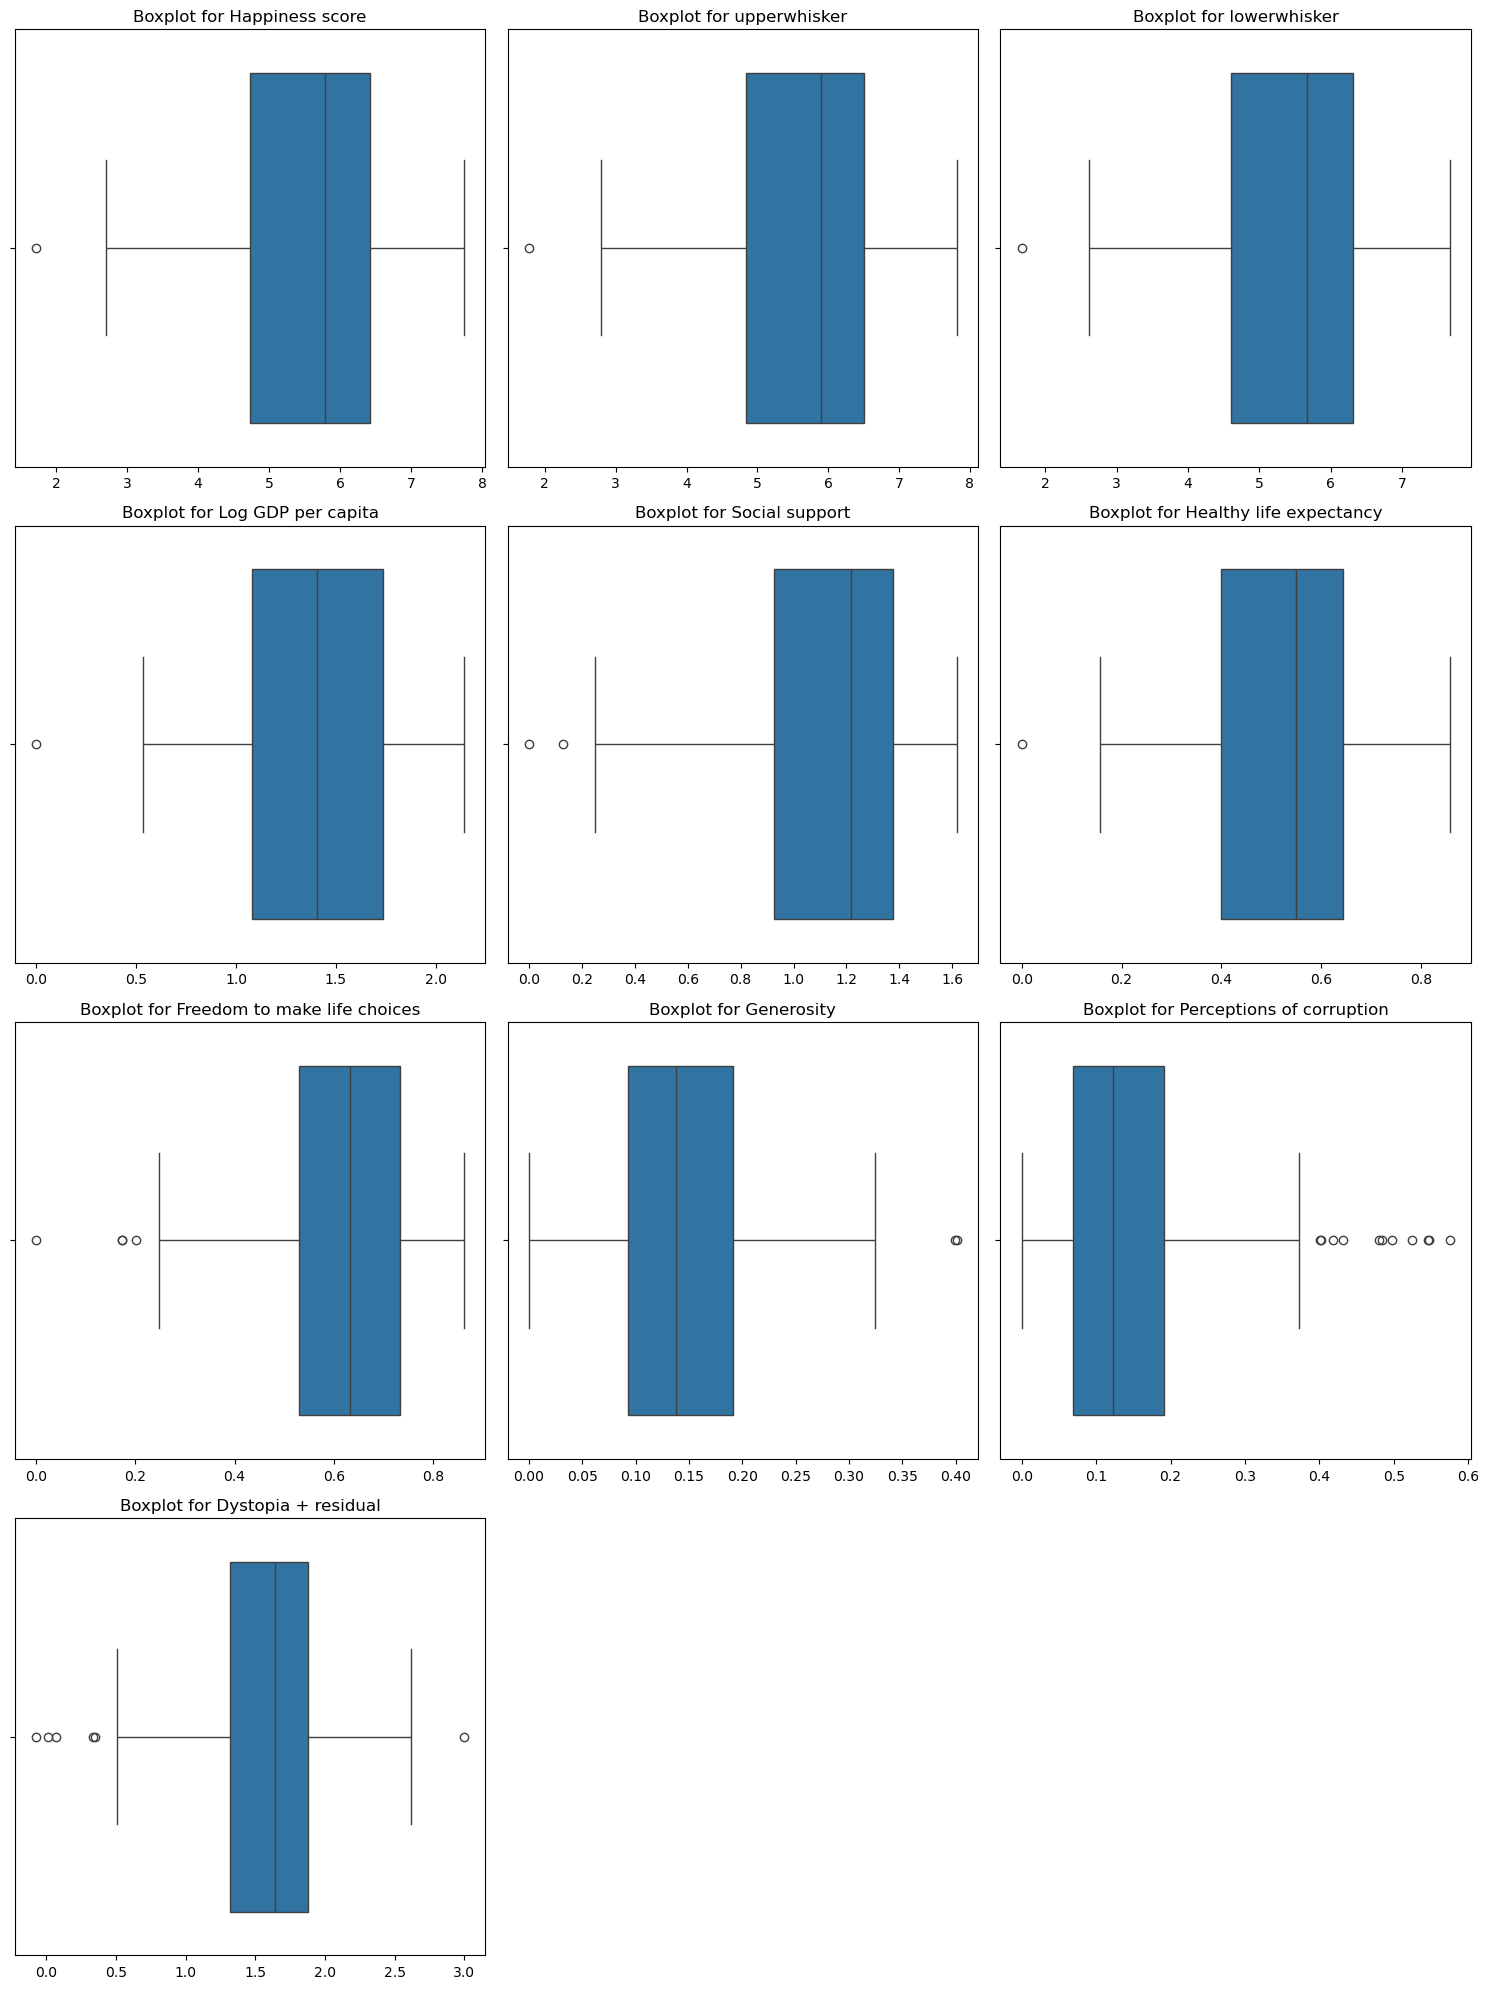

In [133]:
# Set up the subplot grid
num_features = len(numeric_cols)
cols = 3  # Number of columns in the grid
rows = (num_features // cols) + (num_features % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot boxplots for each feature
for i, feature in enumerate(numeric_cols):
    sns.boxplot(data=happy_data, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot for {feature}', fontsize=12)
    axes[i].set_xlabel('')  # Remove x-axis label for clarity

# Remove any unused subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Outliers:** Several boxplots show outliers, particularly for "Perceptions of Corruption" and "Freedom to Make Life Choices." These outliers represent countries with exceptionally high or low values for these variables, which could be taken into consideration.

### Normalisation

In [134]:
happy_data2 = happy_data.copy()

In [135]:
happy_data2.head()

,Country name,Regional indicator,Happiness score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [136]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols2 = happy_data2.select_dtypes(include=np.number).columns

scaler = MinMaxScaler()
happy_data2[numeric_cols2] = scaler.fit_transform(happy_data2[numeric_cols2])

# Display first few rows of the normalized data
happy_data2.head()

,Country name,Regional indicator,Happiness score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,1.000000,1.000000,1.000000,0.861280,0.972171,0.810968,0.995365,0.354115,0.949565,0.701726
1,Denmark,Western Europe,0.973754,0.975166,0.972167,0.891172,0.940012,0.815636,0.953650,0.508728,0.953043,0.636275
2,Iceland,Western Europe,0.964120,0.967384,0.961000,0.878561,1.000000,0.837806,0.949015,0.643392,0.316522,0.691306
3,Sweden,Western Europe,0.934053,0.934934,0.933333,0.877160,0.928262,0.844807,0.971031,0.551122,0.911304,0.563660
4,Israel,Middle East and North Africa,0.933555,0.932119,0.935000,0.842130,0.935683,0.863477,0.742758,0.381546,0.335652,0.772061


In [137]:
happy_data2.describe()

,Happiness score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.632322,0.640095,0.624495,0.644001,0.701502,0.607801,0.719144,0.364767,0.268037,0.536931
std,0.194471,0.191227,0.197855,0.196443,0.203944,0.190398,0.186288,0.181200,0.217213,0.173152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.499169,0.508361,0.489833,0.503970,0.571738,0.466744,0.615295,0.230673,0.120000,0.452621
50%,0.675083,0.682119,0.667833,0.655301,0.752628,0.640607,0.732329,0.344140,0.212174,0.557799
75%,0.779900,0.783526,0.775333,0.809435,0.851577,0.751459,0.850521,0.477556,0.332174,0.635786
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis

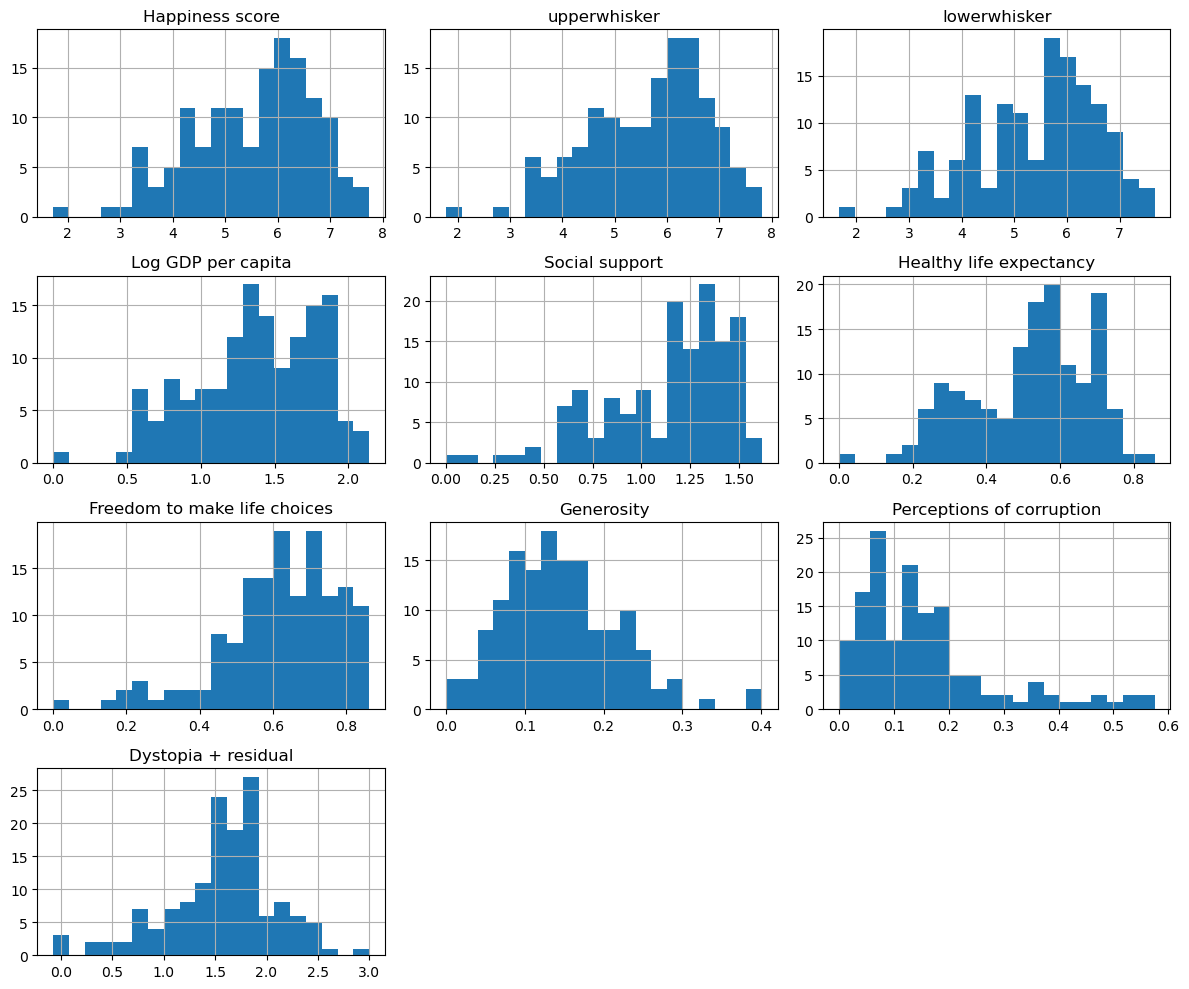

In [138]:
# Plot histograms for all numerical columns
happy_data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

Here we can analyse symmetry of the distributions of each numerical features.

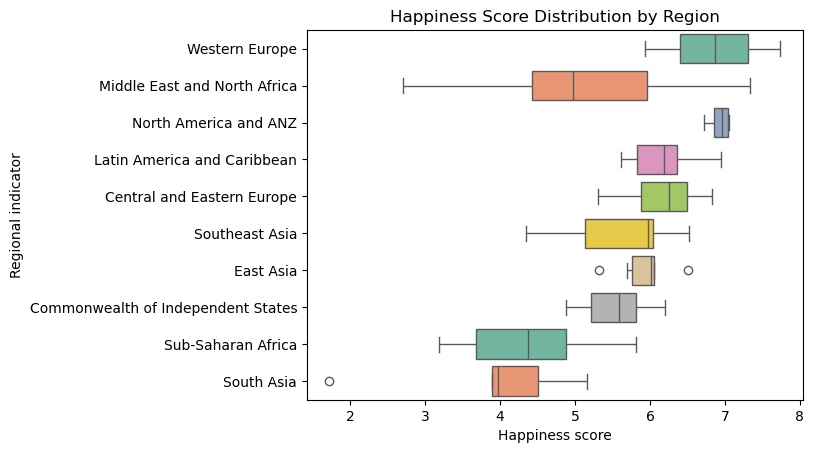

In [139]:
# Boxplot for Ladder score across regions
sns.boxplot(data=happy_data, x='Happiness score', y='Regional indicator',hue='Regional indicator', palette='Set2')
plt.title('Happiness Score Distribution by Region')
plt.show()

Boxplot reveals differences in the distribution of Ladder score by region, highlighting regional disparities in happiness.

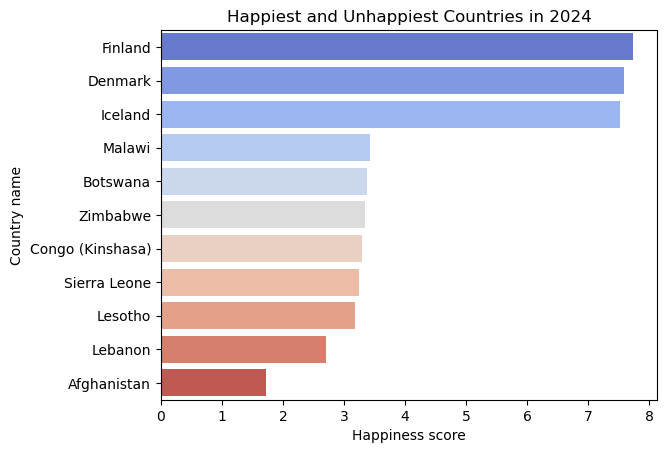

In [140]:
happiest_unhappiest = happy_data[(happy_data.loc[:,'Happiness score']>7.4)|(happy_data.loc[:,'Happiness score']<3.5)]
sns.barplot(x = 'Happiness score', y= 'Country name',data = happiest_unhappiest, palette = 'coolwarm', hue='Country name')
plt.title('Happiest and Unhappiest Countries in 2024')
plt.show()

This barplot plots the happiest(top 5) to the unhappiest(top 5) countries.

### Checking India versus other nations

Text(0.5, 0, 'Countries')

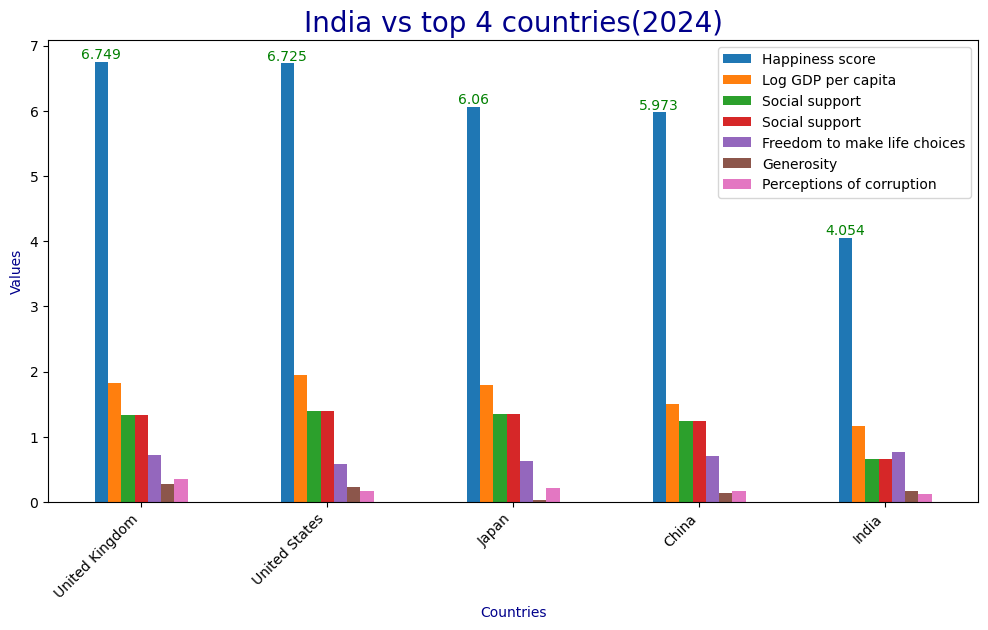

In [141]:
# Filter the data for each country
countries = happy_data[happy_data["Country name"].isin(["India", "United Kingdom", "United States", "Japan", "China"])]

ax=countries[[ 'Happiness score', 'Log GDP per capita',
       'Social support', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].plot(kind="bar",figsize=(12,6))
ax.set_xticklabels(countries["Country name"], rotation=45, ha='right', fontsize=10)

ax.bar_label(ax.containers[0],color="green")
plt.title("India vs top 4 countries(2024)",color="darkblue",fontsize=20)
plt.ylabel("Values",color="darkblue")
plt.xlabel("Countries",color="darkblue")

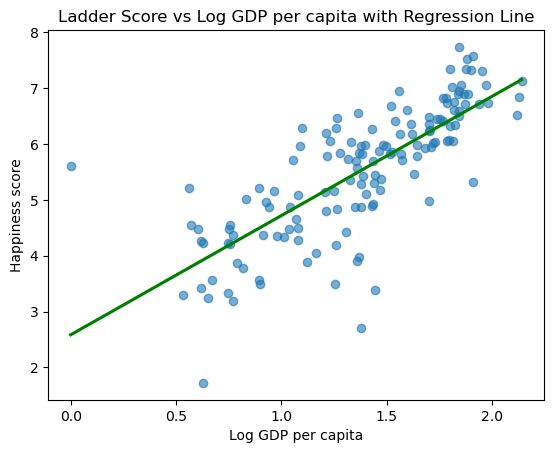

In [142]:
# Scatterplot for Log GDP per capita vs Happiness score
sns.regplot(data=happy_data, x='Log GDP per capita', y='Happiness score', ci=None, scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
plt.title('Ladder Score vs Log GDP per capita with Regression Line')
plt.show()

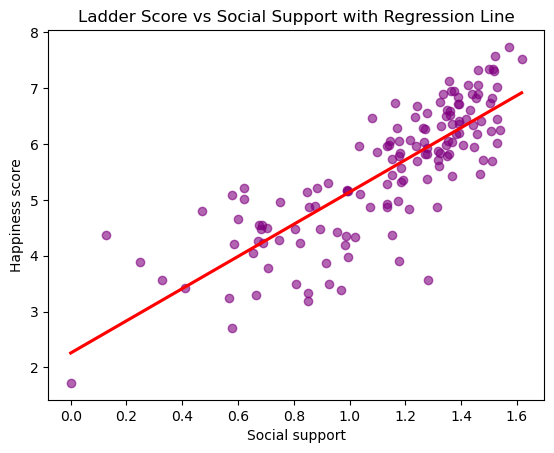

In [143]:
# Scatterplot with regression line for Social support vs Happiness score
sns.regplot(data=happy_data, x='Social support', y='Happiness score', ci=None, scatter_kws={'alpha':0.6}, color="purple",line_kws={'color':'red'})
plt.title('Ladder Score vs Social Support with Regression Line')
plt.show()

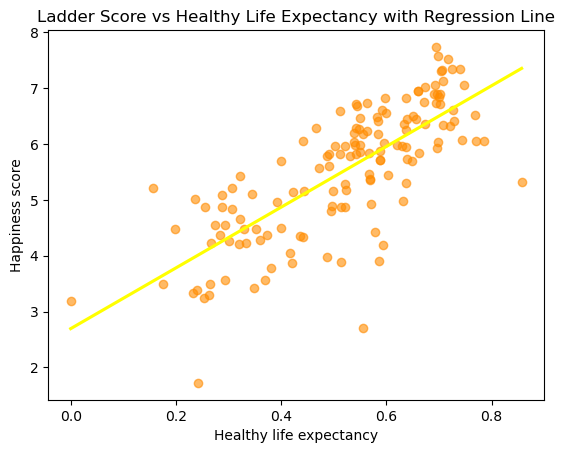

In [144]:
# Scatterplot with regression line for Healthy life expectancy vs Ladder score
sns.regplot(data=happy_data, x='Healthy life expectancy', y='Happiness score', ci=None, scatter_kws={'alpha':0.6}, color="darkorange", line_kws={'color':'yellow'})
plt.title('Ladder Score vs Healthy Life Expectancy with Regression Line')
plt.show()

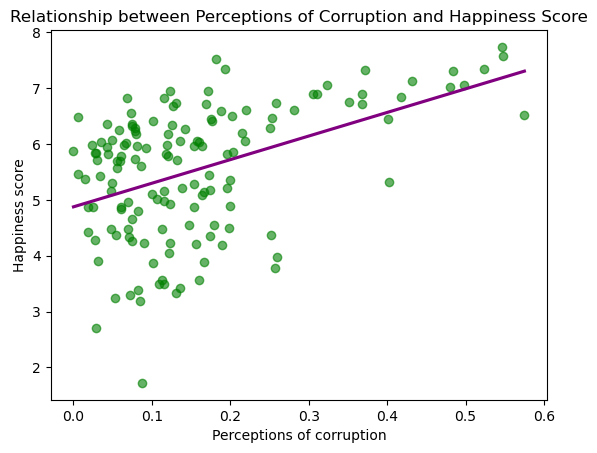

In [145]:
# Scatterplot with regression line for Freedom to make life choices vs Ladder score (purple line)

sns.regplot(data=happy_data, x='Perceptions of corruption', y='Happiness score', ci=None,color="green", scatter_kws={'alpha':0.6}, line_kws={'color':'purple'})
plt.title('Relationship between Perceptions of Corruption and Happiness Score')
plt.show()

These scatter plots show whether the relationship of each factor is significant, strong, moderate or negative to the Happiness score

### Correlation Analysis

Correlation analysis measures the linear relationship between numerical variables. It helps identify how changes in one feature are associated with changes in another.

In [146]:
# Drop Country name, upperwhisker, lowerwhisker and Regional indicators for correlation analysis
data_encoded = happy_data.drop(columns=['Country name', "upperwhisker", "lowerwhisker", 'Regional indicator'])

data_encoded.head()

,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298


The `Regional indicator` needed to be changed from categorical values to numerical values.

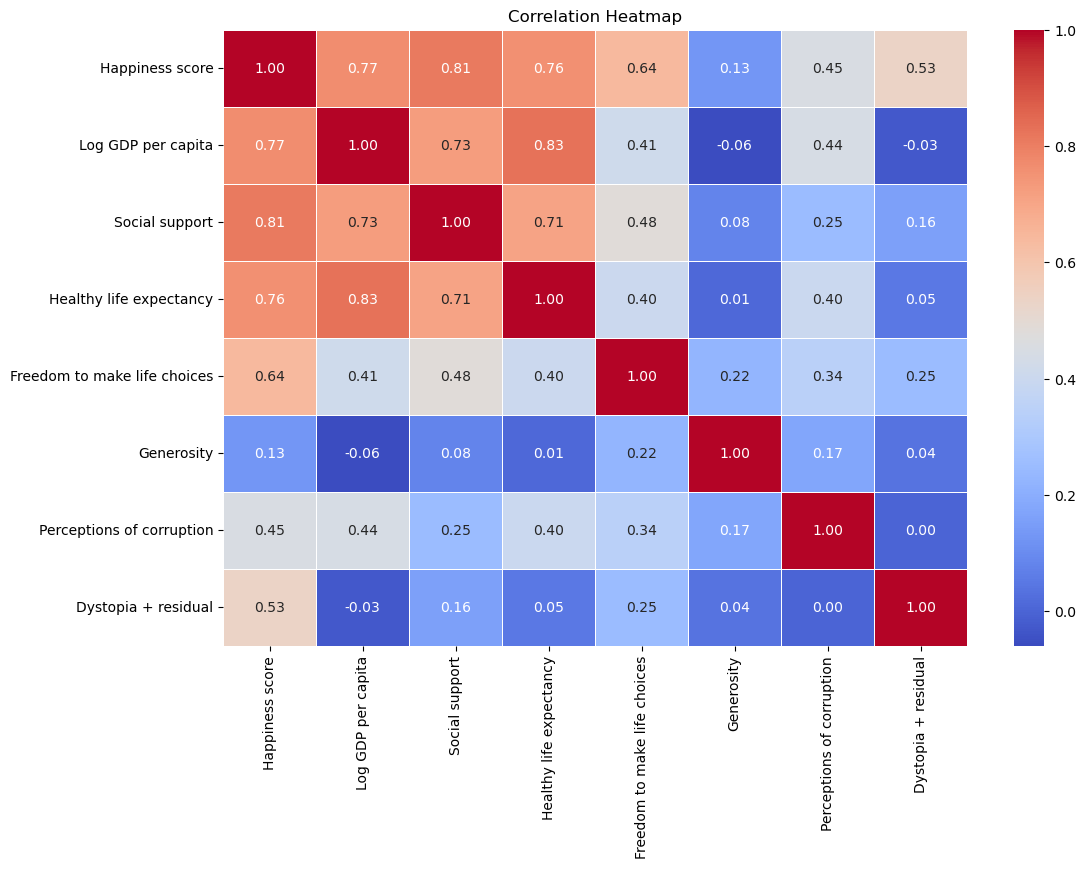

In [147]:
# Compute correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Key features to note:**

* `Log GDP per capita`, `Social support`, and `Healthy life expectancy` are the factors that have high correlation with `Happiness score`.
* `Perceptions of corruption` and `Dystopia + residual` have only moderate correlation with `Happiness score`.
* `Generosity` has weak correlation with every other metrics.

### Covariance Analysis

Covariance measures the directional relationship between two variables, showing how they vary together. Unlike correlation, it does not normalize values between -1 and 1.

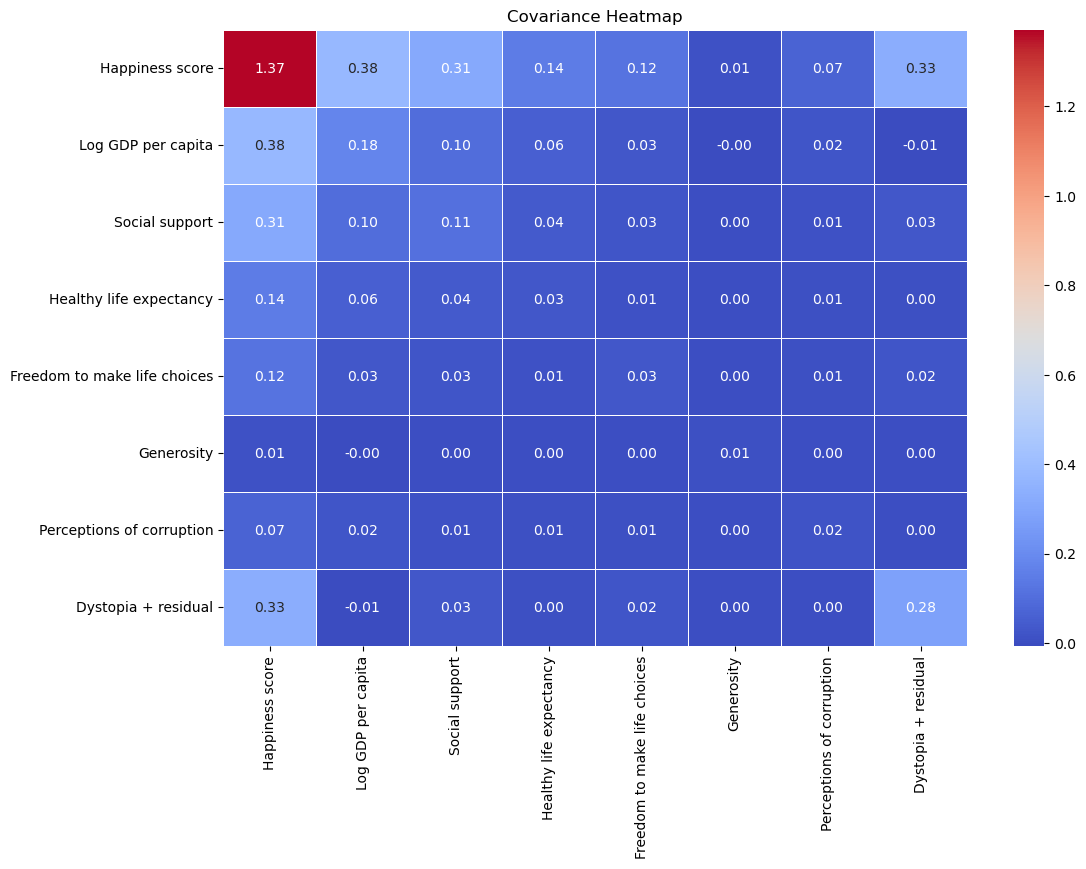

In [148]:
# Compute the covariance matrix
covariance_matrix = data_encoded.cov()

# Heatmap for covariance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Covariance Heatmap')
plt.show()

Based on the covariance analysis of the World Happiness Report data, we can see that economic factors (GDP) and social support have the strongest positive influence on happiness scores. The psychological factors like generosity and corruption perception show weaker correlations.

### Descriptive Statistical Analysis

In [149]:
data_encoded.head()

,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298


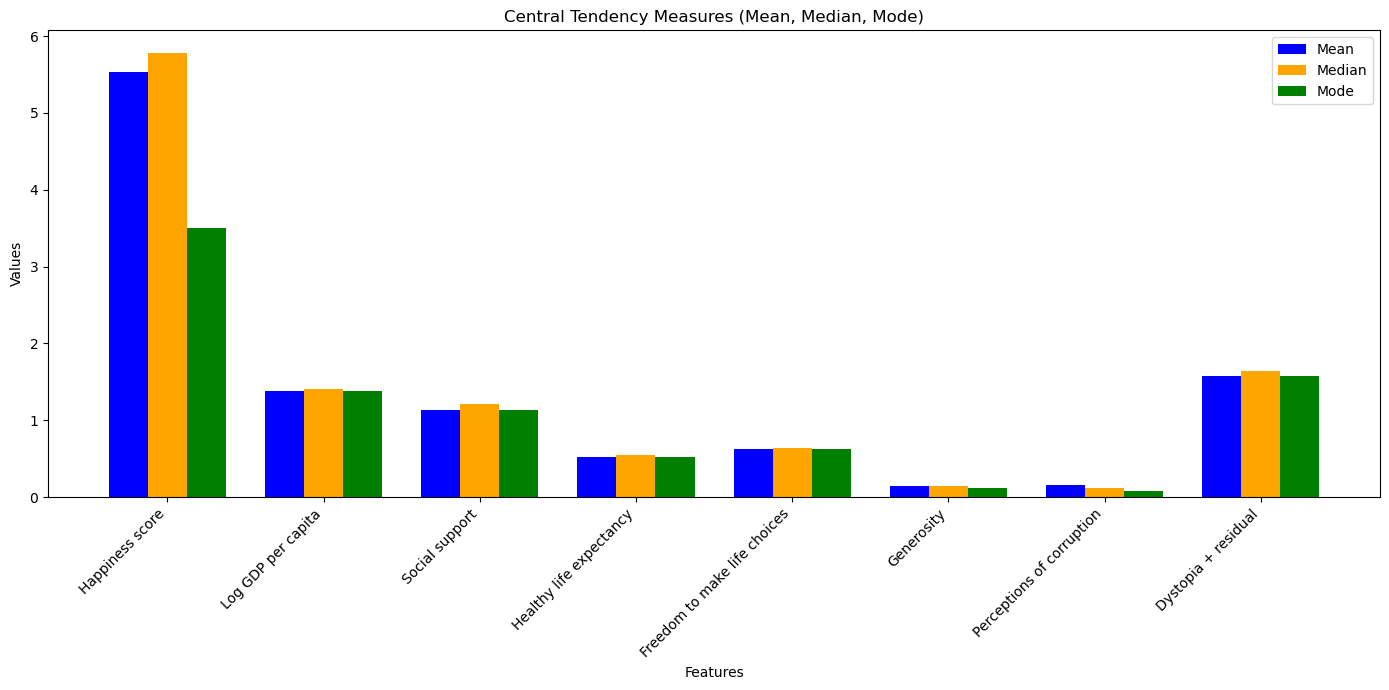

In [150]:
# Calculate mean, median, and mode for all numerical columns
mean_values = data_encoded.mean()
median_values = data_encoded.median()
mode_values = data_encoded.mode().iloc[0]  # Take the first mode (mode can have multiple values)

# Combine the statistics into a single DataFrame for plotting
central_tendency = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

# Plotting
plt.figure(figsize=(14, 7))
bar_width = 0.25  # Width of individual bars
index = range(len(central_tendency))  # Position of bars

# Create separate bars for mean, median, and mode
plt.bar([i - bar_width for i in index], central_tendency['Mean'], bar_width, label='Mean', color='blue')
plt.bar(index, central_tendency['Median'], bar_width, label='Median', color='orange')
plt.bar([i + bar_width for i in index], central_tendency['Mode'], bar_width, label='Mode', color='green')

# Customize the chart
plt.xticks(index, central_tendency.index, rotation=45, ha='right')
plt.title('Central Tendency Measures (Mean, Median, Mode)')
plt.ylabel('Values')
plt.xlabel('Features')
plt.legend()
plt.tight_layout()
plt.show()

This bar plot shows the mean(blue), median(orange) and mode(green) values for each numerical variable. When the mean and median are close to each other, it suggests a more symmetric distribution. 

**Notable observations:**
* Happiness score has the highest central tendency measures.
* Most other variables have central tendencies between 0 and 2.
* Measures of Generosity and Perception of corruption are coparatively low (between 0 and 0.5).
* The mean and median are relatively close for most variables, suggesting fairly symmetric distributions.

### Inferential Statistical Analysis

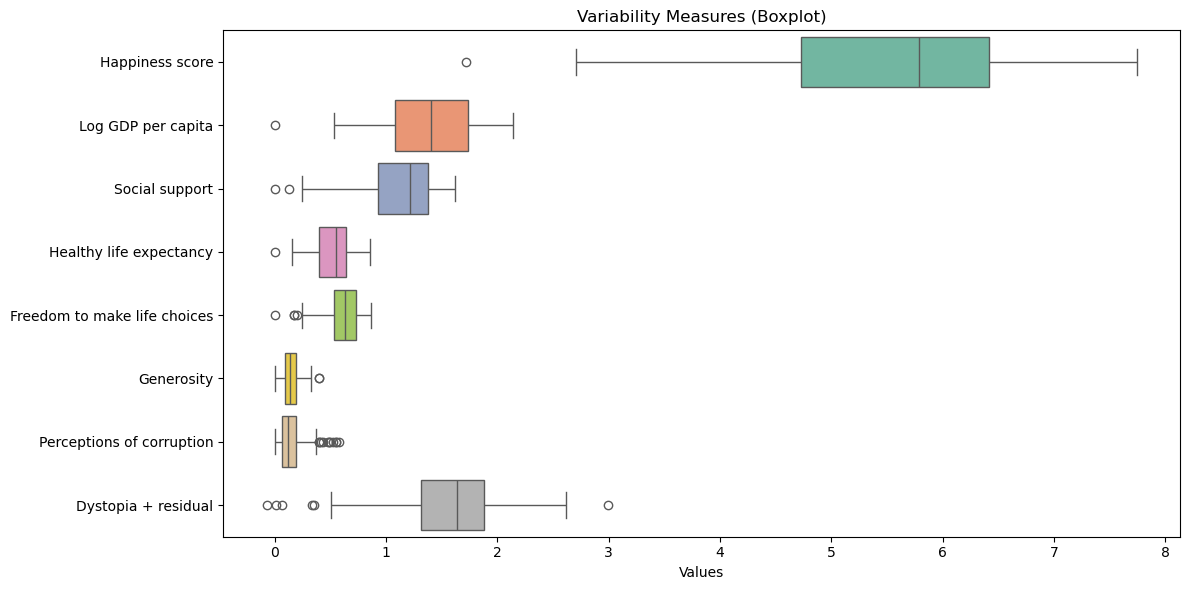

In [151]:
# Plot variability measures using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_encoded, orient='h', palette='Set2')
plt.title('Variability Measures (Boxplot)')
plt.xlabel('Values')
plt.tight_layout()
plt.show()

Statistical Summary:
╭──────┬───────────────────┬──────────────────────┬──────────────────┬───────────────────────────┬────────────────────────────────┬──────────────┬─────────────────────────────┬───────────────────────╮
│      │   Happiness score │   Log GDP per capita │   Social support │   Healthy life expectancy │   Freedom to make life choices │   Generosity │   Perceptions of corruption │   Dystopia + residual │
├──────┼───────────────────┼──────────────────────┼──────────────────┼───────────────────────────┼────────────────────────────────┼──────────────┼─────────────────────────────┼───────────────────────┤
│ mean │             5.528 │                1.379 │            1.134 │                     0.521 │                          0.621 │        0.146 │                       0.154 │                 1.576 │
│ std  │             1.171 │                0.421 │            0.33  │                     0.163 │                          0.161 │        0.073 │                       0.125 

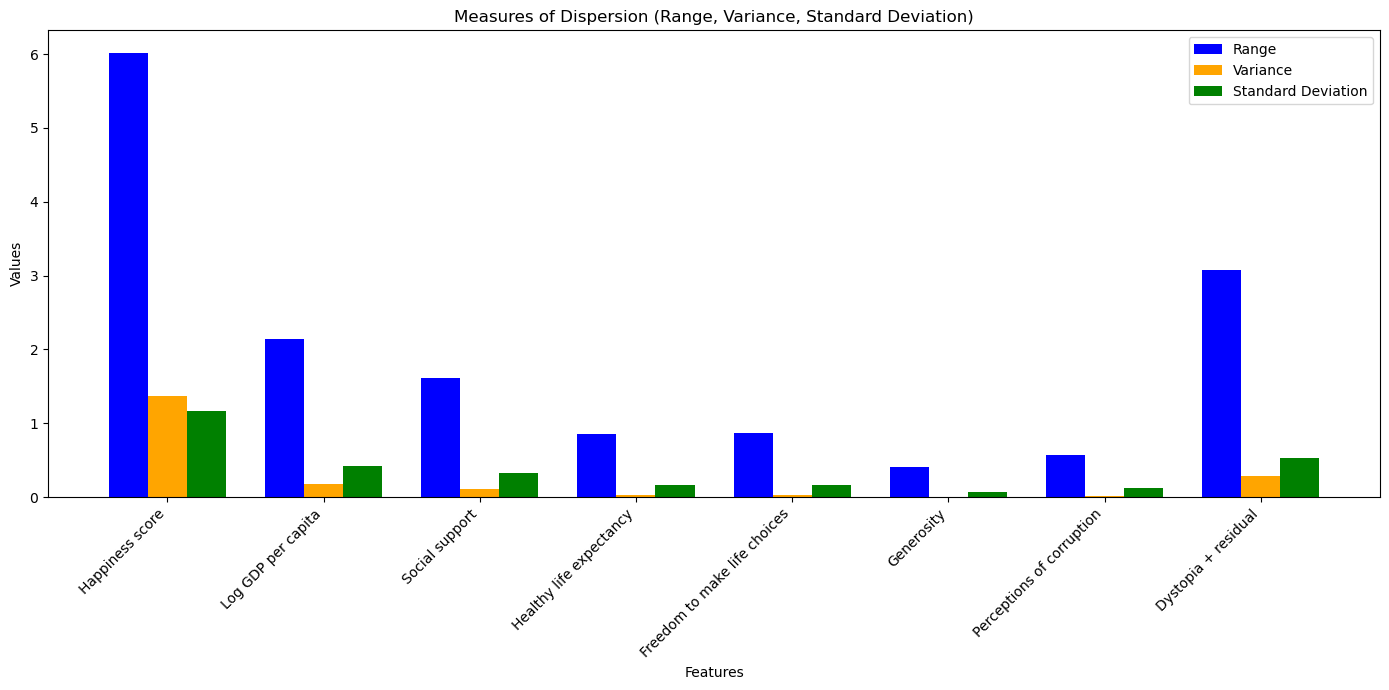

In [152]:
from tabulate import tabulate

# Calculate statistics
stats = data_encoded.agg(['mean', 'std', 'var']).round(3)
print("Statistical Summary:")

# Display table
print(tabulate(stats, headers='keys', tablefmt='rounded_outline'))

# Calculate measures of dispersion for all numerical columns
range_values = data_encoded.max() - data_encoded.min()
variance_values = data_encoded.var()
std_dev_values = data_encoded.std()

# Combine the statistics into a single DataFrame for plotting
dispersion_measures = pd.DataFrame({
    'Range': range_values,
    'Variance': variance_values,
    'Standard Deviation': std_dev_values
})

# Plotting
plt.figure(figsize=(14, 7))
bar_width = 0.25  # Width of individual bars
index = range(len(dispersion_measures))  # Position of bars

# Create separate bars for range, variance, and standard deviation
plt.bar([i - bar_width for i in index], dispersion_measures['Range'], bar_width, label='Range', color='blue')
plt.bar(index, dispersion_measures['Variance'], bar_width, label='Variance', color='orange')
plt.bar([i + bar_width for i in index], dispersion_measures['Standard Deviation'], bar_width, label='Standard Deviation', color='green')

# Customize the chart
plt.xticks(index, dispersion_measures.index, rotation=45, ha='right')
plt.title('Measures of Dispersion (Range, Variance, Standard Deviation)')
plt.ylabel('Values')
plt.xlabel('Features')
plt.legend()
plt.tight_layout()
plt.show()

The graph shows three measures of dispersion - Range (blue), Variance (red), and Standard Deviation (green) across different features.
* Other than Happiness score, `Log GDP per capita` and `Dystopia + residual` depicts the highest variance

### Hyposthesis Testing on key features



#### 1. Performing t-test

**Problem statement:**  The mean happiness score of a sample significantly differs from the population mean.

Null Hypothesis(H<sub>0</sub>): The sample mean is equal to the population mean.

Alternating Hypothesis(H<sub>1</sub>): The sample mean is different from the population mean.

Choose the Significant Level(α) to be: `5%`

In [153]:
from scipy.stats import ttest_1samp

# Random sampling
sample_data = data_encoded['Happiness score'].sample(30, random_state=42)
population_mean = data_encoded['Happiness score'].mean()

print(f"sample data: {sample_data.mean():.2f}")
print(f"population: {population_mean:.2f}")


t_stat, p_value = ttest_1samp(sample_data, population_mean)

# Results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)


if p_value < 0.05:
    print("Reject Null Hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference between sample and population mean.")

sample data: 5.58
population: 5.53
T-Statistic: 0.27598429961677456
P-Value: 0.7845173634426283
Fail to Reject Null Hypothesis: No significant difference between sample and population mean.


#### 2. Performing chi-squred test

**Problem statement:**  Testing Association Between Log GDP per capita and Happiness Score Categories

**NOTE:** Discretize Log GDP per capita and Happiness score into categories using quantiles (e.g., high, medium, low).

Null Hypothesis(H<sub>0</sub>): The two variables are independent.

Alternating Hypothesis(H<sub>1</sub>): The two variables are not independent.

Choose the Significant Level(α) to be: `5%`

In [154]:
from scipy.stats import chi2_contingency
import pandas as pd

# Discretize variables into categories
data_encoded['GDP_category'] = pd.qcut(data_encoded['Log GDP per capita'], 3, labels=['Low', 'Medium', 'High'])
data_encoded['Happiness_category'] = pd.qcut(data_encoded['Happiness score'], 3, labels=['Low', 'Medium', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(data_encoded['GDP_category'], data_encoded['Happiness_category'])

# Display table
print(tabulate(contingency_table, headers='keys', tablefmt='rounded_outline'))


# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results
print("Chi-Square Statistic:", round(chi2, 2))
print("P-Value:", p)
if p < 0.05:
    print("Reject Null Hypothesis: There is an association between GDP and Happiness categories.")
else:
    print("Fail to Reject Null Hypothesis: No association between GDP and Happiness categories.")

╭────────────────┬───────┬──────────┬────────╮
│ GDP_category   │   Low │   Medium │   High │
├────────────────┼───────┼──────────┼────────┤
│ Low            │    36 │       10 │      2 │
│ Medium         │    11 │       27 │      9 │
│ High           │     1 │       11 │     36 │
╰────────────────┴───────┴──────────┴────────╯
Chi-Square Statistic: 92.74
P-Value: 3.444407353971418e-19
Reject Null Hypothesis: There is an association between GDP and Happiness categories.


#### 3. Performing ANOVA test

**Problem statement:**  Testing the Effect of Perceptions of corruption on Happiness Score

**NOTE:** Discretize Perceptions of corruption and Happiness score into categories using quantiles (e.g., high, medium, low).

Null Hypothesis(H<sub>0</sub>): The means of all groups are equal. No significant difference in happiness scores across corruption categories.

Alternating Hypothesis(H<sub>1</sub>): At least one group mean is different. There is a significant difference in happiness scores across corruption categories.

Choose the Significant Level(α) to be: `5%`

In [155]:
from scipy.stats import f_oneway

# Step 1: Discretize Perceptions of Corruption into categories
data_encoded['Corruption_category'] = pd.qcut(data_encoded['Perceptions of corruption'], 
                                      3, 
                                      labels=['Low Corruption', 'Medium Corruption', 'High Corruption'])

# Step 2: Create groups based on Corruption categories
low_corr = data_encoded[data_encoded['Corruption_category'] == 'Low Corruption']['Happiness score']
medium_corr = data_encoded[data_encoded['Corruption_category'] == 'Medium Corruption']['Happiness score']
high_corr = data_encoded[data_encoded['Corruption_category'] == 'High Corruption']['Happiness score']

# Step 3: Perform ANOVA test
f_stat, p_value = f_oneway(low_corr, medium_corr, high_corr)

# Step 4: Display results
print("F-Statistic:", f_stat)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in happiness scores across corruption categories.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in happiness scores across corruption categories.")

F-Statistic: 15.375830138484378
P-Value: 9.192148582323732e-07
Reject Null Hypothesis: There is a significant difference in happiness scores across corruption categories.
